<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
# Write your code here

import pandas as pd
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from gensim.models import LsiModel
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.8 MB/s eta 0:00:00


In [5]:
!pip install bertopic

from google.colab import files
#files.upload()  # Upload the 'Movie reviews after sentiment analysis (1).csv' file

import pandas as pd
df = pd.read_csv('/content/Movie reviews after sentiment analysis (1).csv')

df.head()  # Display the DataFrame to verify if it's loaded correctly


,Document ID,clean_review,Sentiment
0,1,margot best she given film disappoint market f...,Positive
1,2,make barbi greta gerwig singlehandedli direct ...,Positive
2,3,qualiti humor write movi fun quirki uniqu get ...,Positive
3,4,much pain give movi call barbi brilliantli han...,Positive
4,5,woman grew barbi excit movi curiou see would e...,Positive


In [6]:
df = df.drop_duplicates(ignore_index=True)

In [7]:
stop_word = stopwords.words('english')
stop_word += ['com', 'ect', 'www', 'email', 'one', 'two', 'shall', 'will','muzo','edt','cds','sav','ong','vnbl','pll','dik','btu','shl','wiil','eet','mmjx','spfa','may','could','like','may','hou','edu','ees','also','let','get','much','give','make','want','know','http','would','take','need']
p = ['0','1','2','3','4','5','6','7','8','9']
def text_manipulation(text): #text cleaning
    text = text.lower() #text lowering
    tokenzie_text = word_tokenize(text)
    without_punt = [word for word in tokenzie_text if word not in string.punctuation] #removing puctuncations
    without_stop_w = [word for word in without_punt if word not in stop_word] # removing stop_words
    without_num = []
    for word in without_stop_w: #forloop for removing the digits
        if word.isdigit():
            continue
        if word.isalnum():
            word = list(word)
            words = [i for i in word if i not in p]
            word = ''.join(words)
            without_num.append(word)
        else:
            without_num.append(word)
    without_len1_2 = [word for word in without_num if len(word) >=3]
    return without_len1_2

In [9]:
df['clean_review'] = df['clean_review'].apply(text_manipulation)

In [10]:
vocubulary = list()
for word_list in df['clean_review']: #for loop for getting the count of each words
   vocubulary.append(word_list)

In [11]:
vocubulary # features

[['margot',
  'best',
  'given',
  'film',
  'disappoint',
  'market',
  'fun',
  'quirki',
  'satir',
  'homag',
  'movi',
  'start',
  'way',
  'end',
  'overdramat',
  'speech',
  'end',
  'clearli',
  'tri',
  'audienc',
  'feel',
  'someth',
  'left',
  'everyon',
  'feel',
  'confus',
  'say',
  'crotcheti',
  'old',
  'man',
  'woman',
  'pretti',
  'sure',
  'movi',
  'target',
  'audienc',
  'saddest',
  'part',
  'parent',
  'kid',
  'theater',
  'victim',
  'poor',
  'market',
  'kid',
  'movi',
  'overal',
  'humor',
  'fun',
  'occas',
  'film',
  'beauti',
  'look',
  'whole',
  'concept',
  'fall',
  'apart',
  'second',
  'half',
  'film',
  'becom',
  'piti',
  'parti',
  'strong',
  'woman'],
 ['barbi',
  'greta',
  'gerwig',
  'singlehandedli',
  'direct',
  'film',
  'ladi',
  'bird',
  'littl',
  'woman',
  'girl',
  'precipic',
  'adolesc',
  'nuanc',
  'layer',
  'portray',
  'motherdaught',
  'relationship',
  'combin',
  'imagin',
  'visual',
  'clever',
  'dia

In [12]:
id2word = corpora.Dictionary(list(vocubulary))

# Create Corpus
texts = vocubulary

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 3), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2)]]


In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    c_v = []
    m_l = []
    for k in range(start, limit, step):
        model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics= k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        m_l.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(coherencemodel.get_coherence())

    return m_l, c_v

In [14]:
m_l, c_v = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=vocubulary, start=2, limit=40, step=6)

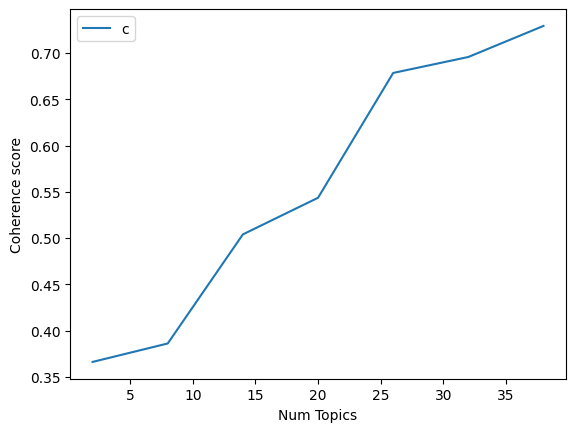

In [15]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, c_v)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
i = 0
for k in range(start, limit, step):
  print("Model : "+str(i))
  print("k-value : "+str(k))
  print('Perplexity: ', m_l[i].log_perplexity(corpus))
  print('Coherence Score: ', c_v[i])
  print('*'*10)
  i+=1

Model : 0
k-value : 2
Perplexity:  -6.199705565018613
Coherence Score:  0.3662360160132613
**********
Model : 1
k-value : 8
Perplexity:  -5.436215197718665
Coherence Score:  0.3861615775531684
**********
Model : 2
k-value : 14
Perplexity:  -5.134092710942423
Coherence Score:  0.5040272050146465
**********
Model : 3
k-value : 20
Perplexity:  -4.974650247812896
Coherence Score:  0.5435864978319253
**********
Model : 4
k-value : 26
Perplexity:  -4.875417513542996
Coherence Score:  0.6784467340156414
**********
Model : 5
k-value : 32
Perplexity:  -4.7385559880632515
Coherence Score:  0.6956954713489704
**********
Model : 6
k-value : 38
Perplexity:  -4.772432499064969
Coherence Score:  0.7292631530734941
**********


In [17]:
model =gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= 10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [18]:
model_topics = model.show_topics(formatted=False)
for i in model_topics:
  print(i)

(0, [('best', 0.02225741), ('design', 0.02225741), ('find', 0.02225741), ('gosl', 0.02225741), ('movi', 0.02225741), ('see', 0.014844409), ('surprisingli', 0.014844409), ('well', 0.014844409), ('perfect', 0.014844409), ('day', 0.014844409)])
(1, [('movi', 0.07277289), ('barbi', 0.027296862), ('thing', 0.022749262), ('seem', 0.022749262), ('see', 0.01820166), ('kid', 0.01820166), ('way', 0.01820166), ('realli', 0.01820166), ('kind', 0.01820166), ('didnt', 0.013654058)])
(2, [('barbi', 0.024840854), ('movi', 0.024840854), ('fun', 0.017745972), ('funni', 0.014198524), ('good', 0.014198524), ('great', 0.014198524), ('even', 0.014198524), ('time', 0.014198524), ('film', 0.014198524), ('gerwig', 0.010651081)])
(3, [('barbi', 0.047483467), ('film', 0.020354835), ('land', 0.0101815965), ('world', 0.0101815965), ('mattel', 0.0101815965), ('ken', 0.0101815965), ('real', 0.0067905164), ('ryan', 0.0067905164), ('doll', 0.0067905164), ('fulli', 0.0067905164)])
(4, [('film', 0.037920218), ('barbi', 

**Finding the ideal design for a movie or product is discussed, with an emphasis on perfection and surprise. The first cluster talks about the Barbie movie, emphasizing both its kid-friendly appeal and its plot. The second cluster talks about how entertaining, humorous, and joyful the film is, complimenting both Greta Gerwig and the director. The movie's relationship to the real world and the Mattel brand is covered in the third cluster. The movie's effects on the world and on characters like Ken and Ryan are covered in the fourth cluster. The movie's overall quality and expectations, how it affects viewers' perceptions, the movie-watching experience, the resolution, and the main takeaway are all covered in the fifth cluster.**

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('Movie reviews after sentiment analysis (1).csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['clean_review'], data['Sentiment'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Train Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
svm_pred = svm_classifier.predict(X_test_tfidf)
rf_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("SVM Classifier Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print()
print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

SVM Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**The application of Term Frequency-Inverse Document Frequency (TF-IDF) as a feature extraction technique for sentiment classification is covered in the text. TF-IDF captures both the local and global importance of a word in a document in relation to a group of documents. In order to prevent overfitting and concentrate on the most pertinent terms, it restricts the number of features to 1000. Words that express a positive or negative sentiment are assigned higher weights by TF-IDF, guaranteeing that they are given greater importance in the feature representation. TF-IDF features work well for sentiment classification in new reviews or documents because they can generalize well to data that hasn't been seen before. All things considered, TF-IDF features work well for sentiment classification.**

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

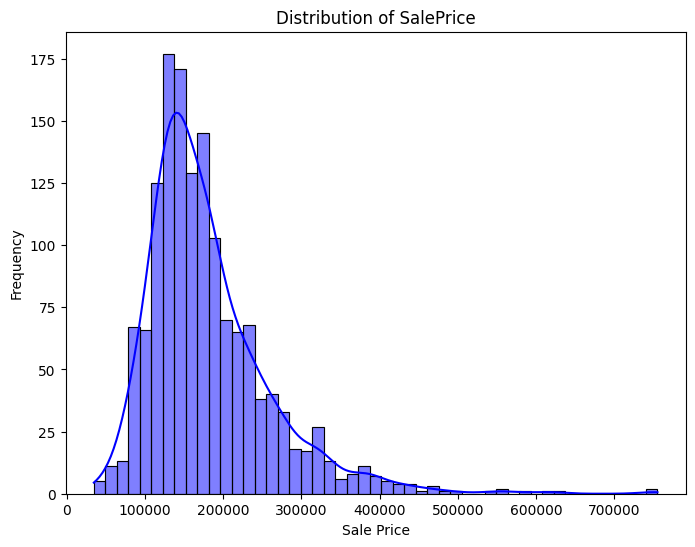

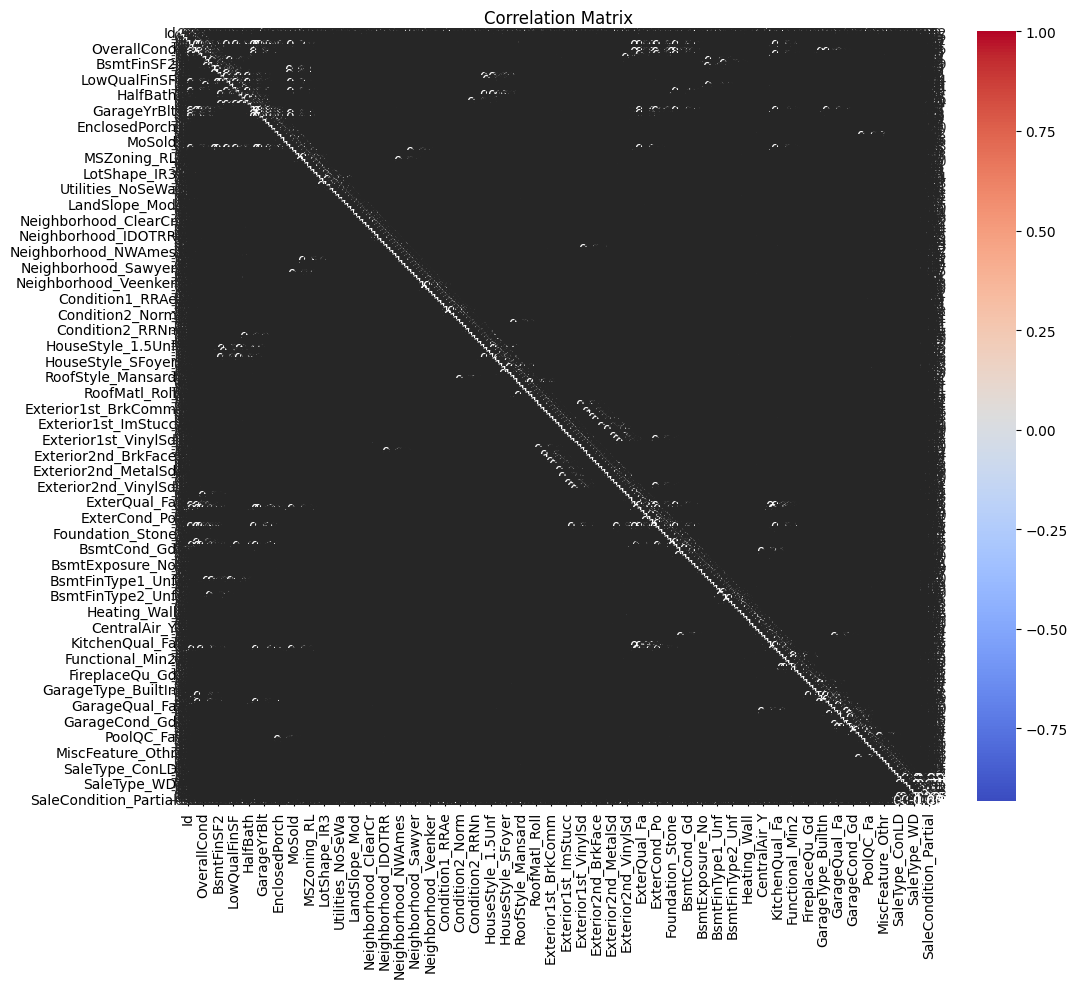

Mean Squared Error: 1565677639.144138
Root Mean Squared Error: 39568.644646287015
R-squared: 0.7958786110456304
Evaluation metrics
Root Mean Squared Error: 39568.644646287015
R² Score: 0.7958786110456304
PREDICTIONS FOR TEST SET
        Id  Predicted Sale Price
0     1461         114362.784924
1     1462         162428.919052
2     1463         167069.138599
3     1464         187256.968178
4     1465         221316.596747
...    ...                   ...
1454  2915          74938.551779
1455  2916          90690.824852
1456  2917         149591.058608
1457  2918         109548.690734
1458  2919         242160.602652

[1459 rows x 2 columns]


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check the structure of the dataset
print(train_data.info())

# Check for missing values
print(train_data.isnull().sum())

# Summary statistics of numerical features
print(train_data.describe())

# Explore the distribution of the target variable (house prices)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Handle categorical variables using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, drop_first=True)

# Correlation analysis
correlation_matrix = train_data_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Select features based on correlation with the target variable
selected_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10).index.tolist()
selected_features.remove('SalePrice')  # Remove the target variable

# Split data for training and testing
X = train_data[selected_features]
y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Develop a regression model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate performance of the regression model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Predicting on test set
y_pred = model.predict(X_test)

# Evaluating the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Evaluation metrics")
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Handle missing values in the test dataset
test_data_encoded.fillna(0, inplace=True)  # Example: replace NaN values with 0

# Making predictions with the model on the external test data
predicted_prices = model.predict(test_data_encoded)

# Creating a DataFrame to display IDs and their predicted Sale Prices
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Predicted Sale Price': predicted_prices
})

# Display the DataFrame with predictions
print("PREDICTIONS FOR TEST SET")
print(predictions_df)


**I chose a subset of features for the regression model based on the findings of the correlation study and the Exploratory Data Analysis (EDA). Strong correlations between these characteristics and the target variable, "SalePrice," suggest that these factors have a big impact on home prices. Our goal is to capture the most significant factors influencing house prices while reducing the possibility of overfitting by concentrating on these highly correlated features. This method guarantees a more economical model that is comprehensible and efficient in forecasting property values according to the chosen characteristics.**

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


**BERT, which stands for Bidirectional Encoder Representations from Transformers, is the chosen Pre-trained Language Model (PLM). BERT was pre-trained using the masked language model (MLM) and next sentence prediction (NSP) tasks on a sizable corpus of text from BooksCorpus and the English Wikipedia. The variant used here, BERT-base-uncased, has 110 million parameters.**

In [9]:
!pip install torch
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv("Movie reviews after sentiment analysis (1).csv")


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

tokenized_texts = df["clean_review"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))


predictions = []
for tokenized_text in tokenized_texts:
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        outputs = model(input_ids)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    predictions.append(predicted_label)


true_labels = df["Sentiment"].map({"Positive": 1, "Negative": 0}).tolist()
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.12
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**One of BERT's benefits is its capacity to record both directions of contextual information, which improves comprehension of word meanings in relation to other words. Strong representations are produced by its pre-training on a variety of data sources, which are useful for a range of NLP tasks. Because BERT is so versatile, fine-tuning it for particular tasks frequently results in state-of-the-art performance.However, because of its large model size and resource-intensive inference computations, using BERT for large datasets or complex tasks may incur high computational costs. Furthermore, large amounts of labeled data and computational power are needed for BERT fine-tuning. Moreover, BERT may have trouble understanding words that are not in its vocabulary or language that is specific to a given domain, necessitating the use of additional strategies.**
